___
# Librerias a usar durante el análisis

In [ ]:
import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt



___
# Diseño del Dataset

In [ ]:
# Ruta del archivo .xlsx
path = 'online_retail_II.xlsx'

# DataFrames de cada hoja, de las 2 hojas del excel 'online_retail_II.xlsx':
# DataFrame Año 2009-2010
df_online_retail_hoja1 = pd.read_excel(path, sheet_name='Year 2009-2010')

# DataFrame Año 2010-2011
df_online_retail_hoja2 = pd.read_excel(path, sheet_name='Year 2010-2011')

# Unión de los 2 Dataframes ("df_online_retail_hoja1" y "df_online_retail_hoja2")
df_online_retail_all = pd.concat([df_online_retail_hoja1, df_online_retail_hoja2])

# Reinicio del índice
df_online_retail_all.reset_index(drop=True, inplace=True)

In [ ]:
# Crear copia del DataFrame original
df_online_retail_all_copy = df_online_retail_all.copy()

___
# **Exploración del DataSet:**

In [ ]:
df_online_retail_all_copy.sample(15)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
216428,510417,22384,LUNCH BAG PINK RETROSPOT,2,2010-05-30 11:28:00,1.65,14546.0,United Kingdom
334592,522053,20914,SET/5 RED SPOTTY LID GLASS BOWLS,32,2010-09-10 14:53:00,2.55,13999.0,United Kingdom
261007,514532,17084N,FAIRY DREAMS INCENSE,2,2010-07-05 10:07:00,0.43,NaN,United Kingdom
879148,567819,22086,PAPER CHAIN KIT 50'S CHRISTMAS,12,2011-09-22 12:42:00,2.95,14004.0,United Kingdom
100329,498878,84947,ANTIQUE SILVER TEA GLASS ENGRAVED,6,2010-02-23 12:35:00,1.25,14726.0,United Kingdom
147888,503442,22146,EASTER CRAFT IVY WREATH WITH CHICK,2,2010-04-01 10:33:00,1.95,18009.0,United Kingdom
357608,524102,22908,PACK OF 20 NAPKINS RED APPLES,5,2010-09-27 12:45:00,0.85,17315.0,United Kingdom
852355,565611,22738,RIBBON REEL SNOWY VILLAGE,10,2011-09-05 14:57:00,1.65,14849.0,United Kingdom
126862,501509,20619,TROPICAL PASSPORT COVER,1,2010-03-17 11:37:00,2.10,16891.0,United Kingdom
355337,523949,22667,RECIPE BOX RETRO SPOT DESIGN,6,2010-09-26 11:50:00,2.95,15805.0,United Kingdom


In [ ]:
# Número de filas y columnas del DataFrame unión
df_online_retail_all_copy.shape

(1067371, 8)

In [ ]:
# Inforamción de las columnas en el DataFrame
df_online_retail_all_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


In [ ]:
# Cantidad de datos nulos en la columnas "Description"
datos_nan_description = df_online_retail_all_copy.shape[0] - df_online_retail_all_copy['Description'].count()

# Cantidad de datos nulos en la columnas "Customer ID"
datos_nan_customerid = df_online_retail_all_copy.shape[0] - df_online_retail_all_copy['Customer ID'].count()

print(f'Datos nulos en la columna "Description": {datos_nan_description}\n'
      f'Datos nulos en la columna "Customer ID": {datos_nan_customerid}')

Datos nulos en la columna "Description": 4382
Datos nulos en la columna "Customer ID": 243007




*	En la columna **"Description"** faltan: 4,382 datos.
*	En la columna **"Customer ID"** faltan: 243,007 datos.


___
# **Limpieza a los registros con datos Nulos:**


**1)** La columna **"Customer ID"** no representa un dato relevante para al análsiis solicitado para la prueba, por lo que es innesesario realizar un procedimiento que brinde una solución a los registros con datos nulos en dicha columna.

**2)** Se encontrará y dará formato a la columna **"Description"** y sus registros que tienen valores nulos:
*	**A.** Los valores en la columna **"StockCode"** son de tipo enteros, flotantes y String.
*	**B.** Castear los índices de la columna **"StockCode"** a tipo **str** todos.
* **C.** Obtener los valores únicos de la columna **"StockCode"**
* **D.** Obtener la descripción (**"Description"**) asociada a cada valor único de **"StockCode"**
* **E.** Asociar a todos los registros del DataFrame (copia), en su columna **"Description"**, la descripción hallada, en función del valor de la columna **"StockCode"** (porque está columna no tiene valores nulos en el DataFrame original)

* **2.A** Y **2.B**: Castear los índices de la columna **"StockCode"** a tipo **str** todos y ordenar el DataFrame.

* Crear una copia de la copia del DataFrame, para obtener los datos buscado sin errores, ya que hay que eliminar los registros nulos de **"Description"**, pero de manera temporal, porque el objetivo es mantener todos los registros del DataFrame original.

In [ ]:
# Crear una copia de la copia del DataFrame
df_online_retail_all_copy_2 = df_online_retail_all_copy[['StockCode', 'Description']].copy()

# Castear los índices de la columna "StockCode" a tipo str en las dos copias del DataFrame
df_online_retail_all_copy['StockCode'] = df_online_retail_all_copy['StockCode'].astype(str)
df_online_retail_all_copy_2['StockCode'] = df_online_retail_all_copy_2['StockCode'].astype(str)

# Eliminar los registros nulos de la columna "Description"
df_online_retail_all_copy_2 = df_online_retail_all_copy_2[df_online_retail_all_copy_2['Description'].notnull()]

# Ordenar el DataFrame en función de la columna "StockCode"
df_online_retail_all_copy_2 = df_online_retail_all_copy_2.sort_values(by='StockCode').reset_index(drop=True)

df_online_retail_all_copy_2

,StockCode,Description
0,10002,INFLATABLE POLITICAL GLOBE
1,10002,INFLATABLE POLITICAL GLOBE
2,10002,INFLATABLE POLITICAL GLOBE
3,10002,INFLATABLE POLITICAL GLOBE
4,10002,INFLATABLE POLITICAL GLOBE
...,...,...
1062984,m,Manual
1062985,m,Manual
1062986,m,Manual
1062987,m,Manual


* **2.C**: Obtener los valores únicos de la columna "StockCode"

In [ ]:
# Obtener una lista con los valores únicos de la columna 'StockCode'
list_stockcode_unicos = list(df_online_retail_all_copy_2['StockCode'].unique())

# Buscar los índices del DataFrame asociados a los valores únicos de "StockCode"
indices_stockcode_unicos = df_online_retail_all_copy_2.drop_duplicates(subset='StockCode', keep='first').index

* **2.D**: Obtener la descripción (**"Description"**) asociada a cada valor único de "StockCode"

In [ ]:
# DataFrame provisional que contiene la descripción asociada \
# a cada valor único de "StockCode"
df_stockcode_description = df_online_retail_all_copy_2[['StockCode', 'Description']].iloc[indices_stockcode_unicos]

df_stockcode_description

,StockCode,Description
0,10002,INFLATABLE POLITICAL GLOBE
398,10002R,ROBOT PENCIL SHARPNER
401,10080,GROOVY CACTUS INFLATABLE
430,10109,BENDY COLOUR PENCILS
431,10120,DOGGY RUBBER
...,...,...
1062970,gift_0001_40,Dotcomgiftshop Gift Voucher £40.00
1062975,gift_0001_50,Dotcomgiftshop Gift Voucher £50.00
1062981,gift_0001_70,Dotcomgiftshop Gift Voucher £70.00
1062982,gift_0001_80,Dotcomgiftshop Gift Voucher £80.00


* **2.E**: Asociar a todos los registros del DataFrame (copia), en su columna **"Description"**, la descripción hallada, en función del valor de la columna **"StockCode"** (porque está columna no tiene valores nulos en el DataFrame original)

In [ ]:
# Diccionario a partir de las columnas 'StockCode' y 'Description'
dict_stockcode_description = df_stockcode_description.set_index('StockCode')['Description'].to_dict()

# Formatear los valores de la columna 'Description' en función del diccionario
df_online_retail_all_copy['Description'] = df_online_retail_all_copy['StockCode'].map(dict_stockcode_description)

In [ ]:
datos_nan_description = df_online_retail_all_copy.shape[0] - df_online_retail_all_copy['Description'].count()
print('Hasta el aqui, se han logrado manejar los valores nulos de la columna '
      '"Description" reduciendolos de 4,382 a {}'.format(datos_nan_description))

Hasta el aqui, se han logrado manejar los valores nulos de la columna "Description" reduciendolos de 4,382 a 363


* Se logró pasar de 4,382 datos nulos en **"Description"** a 363 datos nulos. Esto se da porque en los índices de **"StockCode"** de estos 363 registros, no hay descripción alguna que se puede asociar.
* Para estos 363 datos nulos, se asociará como descripción en **"Description"** el mismo valor que se tiene en **"StockCode"** en dichos casos, es decir, el valor de cada uno de los 363 registro involucrados en **"Description"** será el mismo que su homologo "**StockCode**".

In [ ]:
# Asociar como descripción en "Description" el mismo valor que se tiene en "StockCode"
df_online_retail_all_copy['Description'].fillna(df_online_retail_all_copy['StockCode'], inplace=True)

# Verificar los valores nulos en las columnas del DataFrame
df_online_retail_all_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1067371 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


**Conclusión de la limpieza del DataFrame:**
* Se logró manejar el 100% de los datos nulos que tenía la columna **"Description"** sin la necesidad de eliminar registros del DataFrame.
* Como se mencionó, no se tuvo en cuenta los valores nulos de la columna **"Customer ID"** porque no son relevantes sus datos para el análisis solicitado de la prueba.

# Función para realizar las gráficas del punto 1, punto 2 y punto 3:

In [ ]:
# type_graph toma valores de 0 y 1
# 0 =  Para gráficar BoxPLot
# 1 =  Para gráficar BarPLot

def graph_data(list_data, var_y, type_graph, title='Ventas por mes', label_x='Fecha de venta', label_y='Cantidad de ventas'):

  if type_graph in [0, 1]:
    # Tamaño del canvas
    plt.figure(figsize=(15,100))

    # Dibujar cada gráfica en un subplot
    for i, data in enumerate(list_data):
      plt.subplot(round(len(list_data)/2),2,i+1)

      # Color del fondo del gráfico
      sns.set_style('darkgrid')

      if type_graph == 0:
        df_data = df_online_retail_all_copy[df_online_retail_all_copy['Country'] == data]

        # Gráfico boxplot
        sns.boxplot(y=var_y, data=df_data, saturation=0.8, color="b")

      elif type_graph == 1:
        df_data = df_online_retail_all_copy[df_online_retail_all_copy['Description'] == data]

        # Gráfico barplot
        sns.barplot(x='Country', y=var_y,data=df_data);

      #  Titulo del gráfico
      plt.title(f'{data} Vs {var_y}')

      # Rotación en los labels del eje x
      plt.xticks(rotation=90);

      # Malla en el gráfico
      plt.grid(color='white')

  elif type_graph == 2:
    # Tamaño de la figura
    plt.figure(figsize=(10, 6))

    # Gráficar Vantas alcanzadas por mes Vs el mes
    plt.plot(list_data.index, list_data, marker='o')

    # Stilo del gráfico
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.title(title)

    plt.grid()
    plt.xticks(rotation=90)

    # Agregar líneas verticales para marcar el inicio de cada mes
    for fecha_mes in list_data.index:
        plt.axvline(fecha_mes, color='gray', linestyle='--', alpha=0.8)

    # Agregar líne en la mitad del grafico
    plt.axvline(list_data.index[len(list_data.index) // 2], color='r', linestyle='-')

___

# **Punto 1:**
Realizar un análisis para determinar el `país que más productos consume`. Puedes utilizar las
columnas "País" y "Cantidad" del conjunto de datos para determinar esto.

* Recordar la estructura del DataFrame:

In [ ]:
# Recoradr la estructura del DataFrame
df_online_retail_all_copy.sample(7)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
459334,532901,22578,WOODEN STAR CHRISTMAS SCANDINAVIAN,11,2010-11-15 11:39:00,0.85,15218.0,United Kingdom
736498,555340,47566,PARTY BUNTING,4,2011-06-02 11:33:00,4.95,13334.0,United Kingdom
422900,529831,21891,TRADITIONAL WOODEN SKIPPING ROPE,8,2010-10-31 12:18:00,1.25,17950.0,United Kingdom
321567,520710,20724,RED SPOTTY CHARLOTTE BAG,10,2010-08-29 13:11:00,0.85,14388.0,United Kingdom
205447,509197,21932,SCANDINAVIAN PAISLEY PICNIC BAG,3,2010-05-20 19:29:00,2.95,13291.0,United Kingdom
771538,558680,21175,GIN + TONIC DIET METAL SIGN,1,2011-07-01 11:19:00,4.96,NaN,United Kingdom
492053,535407,85173,SET/6 FROG PRINCE T-LIGHT CANDLES,1,2010-11-26 11:20:00,5.06,NaN,United Kingdom


* Encontré que en la columna cantidades **Quantity** existen valores negativos, es decir, cómo ejemplo, un cliente de un país x compra -14 unidades de un producto y

In [ ]:
# Visualizar los registros que tienen cantidades "Quantity" de compras negativas
df_online_retail_all_copy[df_online_retail_all_copy['Quantity'] < 0].sample(8)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
908364,C569975,23071,MARIE ANTOINETTE TRINKET BOX GOLD,-3,2011-10-06 19:25:00,12.50,14333.0,United Kingdom
110668,C499983,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-1,2010-03-03 15:59:00,2.95,15321.0,United Kingdom
705856,C552317,POST,POSTAGE,-2,2011-05-08 16:12:00,18.00,12700.0,France
43772,C493191,21076,SET/20 COLLAGE PAPER NAPKIN,-1,2009-12-22 13:13:00,0.85,15581.0,United Kingdom
45215,493406,37452A,37452A,-25,2009-12-23 16:02:00,0.00,NaN,United Kingdom
258374,C514340,22109,FULL ENGLISH BREAKFAST PLATE,-1,2010-07-01 15:01:00,3.75,14527.0,United Kingdom
1160,C489553,35004S,SET OF 3 SILVER FLYING DUCKS,-1,2009-12-01 12:41:00,6.35,13545.0,United Kingdom
750698,C556637,22090,PAPER BUNTING RETRO SPOTS,-2,2011-06-13 15:32:00,2.95,15382.0,United Kingdom


* Con base en lo anterior, infiero que es un error los valores de cantidades de compra negativos por lo que los transformó a su valor absoluto.

In [ ]:
# Valor absoluto de la columna "Quantity"
df_online_retail_all_copy['Quantity'] =  df_online_retail_all_copy['Quantity'].abs()

df_online_retail_all_copy[df_online_retail_all_copy['Quantity'] < 0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


* Ya no hay valores negativos en la columna **Quantity**.
* Se pide la cantidad total de productos que consume cada país y encontrar los países que más productos consumen. Agruparé el DataFrame por países y sumaré las cantidades totales de los productos de cada país.

In [ ]:
# Serie para almacenar la cantidad total de productos consumidos por cada país
data_country_quantity = df_online_retail_all_copy[['Country', 'Quantity']]
data_country_quantity = data_country_quantity.groupby('Country')['Quantity'].sum().sort_values(ascending=False)

data_country_quantity

Country
United Kingdom          10575605
Netherlands               387283
France                    365624
EIRE                      349787
Denmark                   240632
Germany                   231425
Australia                 105090
Sweden                     89425
Spain                      56458
Switzerland                53392
Belgium                    35492
Japan                      34832
Portugal                   28760
Norway                     27300
Channel Islands            22491
Italy                      15693
Finland                    14433
Austria                    11850
Cyprus                     11284
United Arab Emirates        7914
Greece                      7741
Hong Kong                   7087
Singapore                   7001
USA                         6828
Unspecified                 6752
Poland                      6012
Israel                      5597
Canada                      3657
Iceland                     3286
Lithuania                   2958
Be

* La serie **"country_quantity"** muestra la suma total de las cantidades de productos que consume cada país en orden descendente, es decir, el país que más productos consume, con base en el conjunto de datos, es **United Kingdom**

* Obtener la visualización de la descripción estadística de las cantidades totales de compras de cada país:

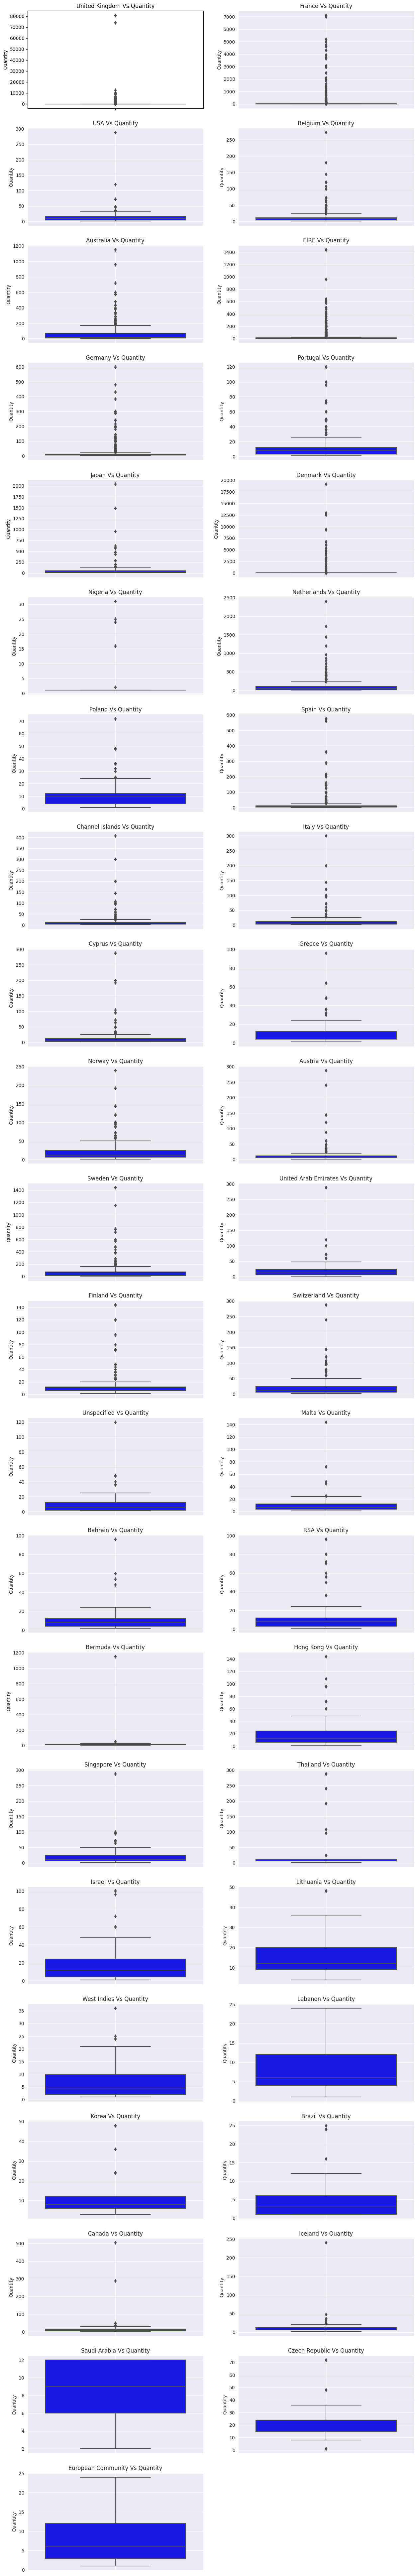

In [ ]:
# Lista de los países en el DataSet
list_countries = list(df_online_retail_all_copy['Country'].unique())

# Graficar las compras totales de cada país usando la función "graph_data"
graph_data(list_data=list_countries, var_y='Quantity', type_graph=0)

* Con la visualización de los productos, se infiere que en su gran mayoria, los paises presentan un gran número de valores atipicos, pero hay paises como la Unión Europea, Arabia Saudita o Liebano, que muestran una compra de productos, por país, establecido dentro de un rango determinado de cantidades sin valores atípicos.

# **Conclusiones**
* Para contestar la pregunta directamente, **United Kingdom** es el país que más consume.

* Se nota una sectorización geográfica de los países que más consumen, junto a United Kingdom, por lo que infiero que los datos son de una organización que tiene su nicho de mercado en Europa central, pero también realiza un par de ventas a América del norte, América del sur y Asia.

___
# **Punto 2**
Realizar un análisis para identificar los productos más vendidos o los más populares en
términos de ganancias o cantidad de ventas.

In [ ]:
# Recordar la estructura del DataSet
df_online_retail_all_copy.sample(7)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1022235,578347,22493,PAINT YOUR OWN CANVAS SET,1,2011-11-24 09:26:00,3.29,NaN,United Kingdom
451484,532306,22630,DOLLY GIRL LUNCH BOX,1,2010-11-11 14:29:00,1.95,12637.0,France
661698,547945,20749,ASSORTED COLOUR MINI CASES,2,2011-03-28 14:59:00,7.95,14851.0,United Kingdom
426459,530115,85067,CREAM SWEETHEART WALL CABINET,1,2010-11-01 14:22:00,18.95,17190.0,United Kingdom
260964,514532,22212,FOUR HOOK WHITE LOVEBIRDS,1,2010-07-05 10:07:00,4.21,NaN,United Kingdom
143935,503067,84795A,PASTEL STRIPE HAMMOCK,2,2010-03-30 09:47:00,7.95,14911.0,EIRE
66994,495356,85131A,BEADED PEARL HEART WHITE ON STICK,12,2010-01-24 11:35:00,1.25,13036.0,United Kingdom


* # Productos más vendidos, en función de la **cantidad** vendida a los países:

In [ ]:
# Nuevo DataFrame con las columnas "Description" y "Quantity"
description_total = pd.DataFrame(df_online_retail_all_copy[['Description', 'Quantity']])

# Agrupar y organizar el nuevo DataFrame para hallar los productos más vendidos
description_total = description_total.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(15)

description_total

Description
PAPER CRAFT , LITTLE BIRDIE            161990
MEDIUM CERAMIC TOP STORAGE JAR         152527
WORLD WAR 2 GLIDERS ASSTD DESIGNS      111953
WHITE HANGING HEART T-LIGHT HOLDER     104835
SMALL POPCORN HOLDER                   101421
JUMBO BAG RED RETROSPOT                101392
PACK OF 72 RETRO SPOT CAKE CASES        97670
ASSORTED COLOUR BIRD ORNAMENT           82929
BROCADE RING PURSE                      72180
PACK OF 60 PINK PAISLEY CAKE CASES      57013
60 TEATIME FAIRY CAKE CASES             55066
ROTATING SILVER ANGELS T-LIGHT HLDR     52128
ASSORTED COLOURS SILK FAN               46414
MINI PAINT SET VINTAGE                  45946
LUNCH BAG RED RETROSPOT                 41873
Name: Quantity, dtype: int64

* Con la serie anterior se muestra los productos más vendidos a nivel general, en todos los países a los que la organización vende sus productos.
* Aparece como el más vendido **PAPER CRAFT , LITTLE BIRDIE** (ARTESANÍA DE PAPEL, PAJARITO) con 161,990 ventas en todos los países, seguido de **MEDIUM CERAMIC TOP STORAGE JAR** (TARRO DE ALMACENAMIENTO CON TAPA DE CERÁMICA MEDIANO) con 152,527 unidades vendidas en todos los países.

Visualizar la intensidad de venta por país de los 15 primero productos más vendidos:

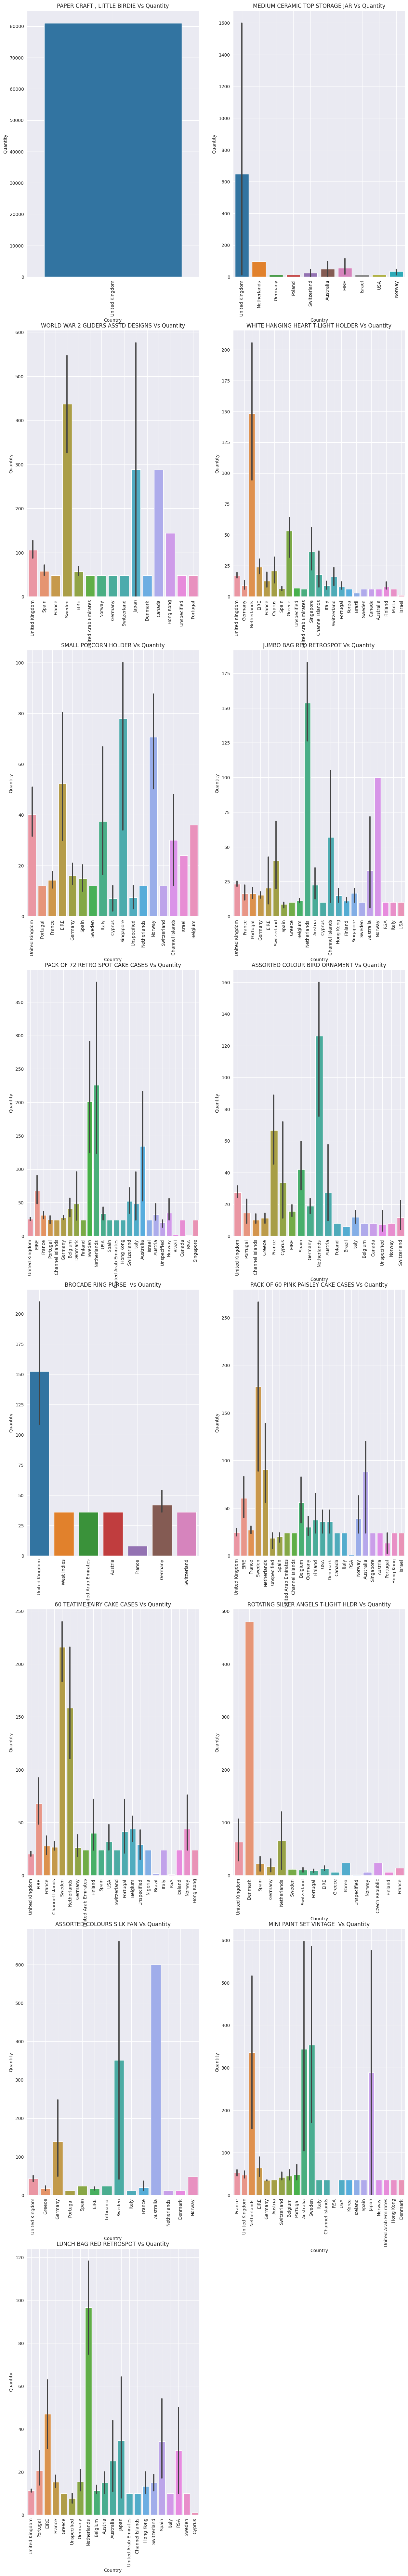

In [ ]:
# Lista con las 15 descripciones (productos) más vendidos
list_productos_mas_vendidos = list(description_total.index)

# Graficar las compras totales de los productos más vendidos discriminado por país
# usando la función "graph_data"
graph_data(list_data=list_productos_mas_vendidos, var_y='Quantity', type_graph=1)

* # Productos más vendidos, en función de la **ganancia** obtenida:

In [ ]:
# Nuevo DataFrame con las columnas "Description" y "Price"
ganancia_total = pd.DataFrame(df_online_retail_all_copy[['Description', 'Price']])

# Agrupar y organizar el nuevo DataFrame para hallar los productos más vendidos
ganancia_total = ganancia_total.groupby('Description')['Price'].sum().sort_values(ascending=False).head(15)

ganancia_total

Description
Manual                                751406.150
AMAZON FEE                            328781.840
DOTCOM POSTAGE                        322667.490
POSTAGE                                69226.690
REGENCY CAKESTAND 3 TIER               61747.010
Bank Charges                           36621.511
RED RETROSPOT CAKE STAND               20867.450
WHITE HANGING HEART T-LIGHT HOLDER     18520.180
SET/4 WHITE RETRO STORAGE CUBES        15856.610
PARTY BUNTING                          15790.750
DOORMAT RED RETROSPOT                  14963.850
HOME BUILDING BLOCK WORD               14419.940
CREAM SWEETHEART MINI CHEST            14317.770
CARRIAGE                               13948.000
DOORMAT UNION FLAG                     13774.070
Name: Price, dtype: float64

* Se observan los productos que generaron mayor ganacia a nivel general, en todos los países a los que la organización vende sus productos.
* Aparece como el producto que obtuvo mayor ganancia a **Manual** con 751,406.15, seguido de **AMAZON FEE** con 328,781.84.
* No queda claro que tipo de produto hace refencia **Manual**.


Visualizar la intensidad de ganancia por país de los 15 primero productos más vendidos:

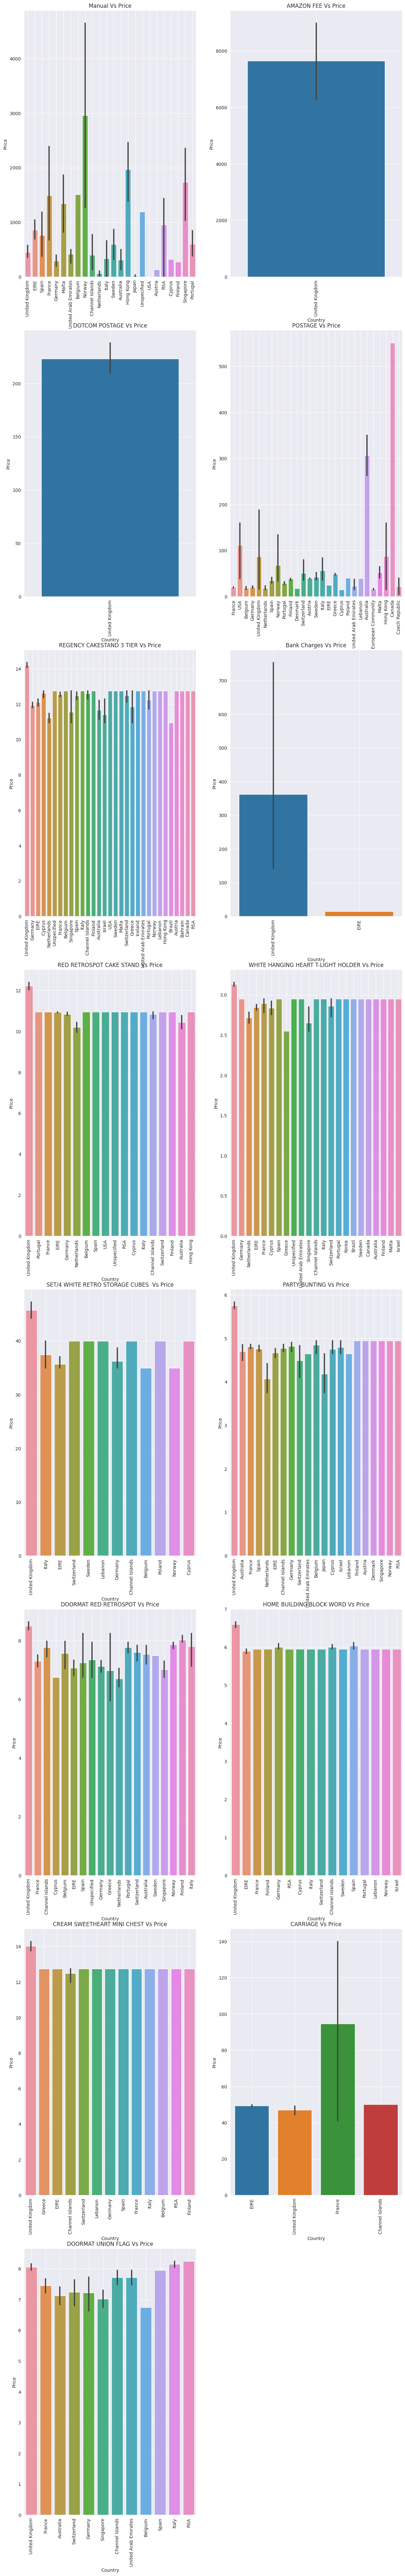

In [ ]:
# Lista con las 15 descripciones (productos) más vendidos
list_productos_mayor_ganancia = list(ganancia_total.index)

# Graficar las compras totales de los productos más vendidos discriminado por país
# usando la función "graph_data"
graph_data(list_data=list_productos_mayor_ganancia, var_y='Price', type_graph=1)

# Producto que aparece entre los 15 más vendidos y entre los 15 con mayor ganancia

In [ ]:
# Intercepción entre las listas de los 15 productos más vendidos
# y los 15 productos de mayor gananacia
interseccion_producto = list(set(list_productos_mas_vendidos).intersection(list_productos_mayor_ganancia))

interseccion_producto

['WHITE HANGING HEART T-LIGHT HOLDER']

**Conclusión:**
* Se obtuvieron datos desde las dos perspectivas, los 15 productos más vendidos y los 15 productos con mayor ganancia y al comparar ambos resultados, se encontró que el único producto que aparece en los 15 más vendidos y los 15 con mayor ganancia es **WHITE HANGING HEART T-LIGHT HOLDER** (PORTALUCES COLGANTE CORAZÓN BLANCO)

* **WHITE HANGING HEART T-LIGHT HOLDER** en el puesto 4 en la lista de productos más vendidos, con un total de 104,835 unidades vendidas en todos los países.

* **WHITE HANGING HEART T-LIGHT HOLDER** en el puesto 8 en la lista de productos con más ganancia, con 18,520.18

___
# **Punto 3**

Analizar el conjunto de datos para detectar patrones y tendencias, por ejemplo, identificar si
hay picos de ventas durante ciertos meses del año.

In [ ]:
df_online_retail_all_copy.sample(8)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
436976,531162,22468,BABUSHKA LIGHTS STRING OF 10,1,2010-11-05 14:21:00,6.75,17841.0,United Kingdom
446049,531843,22417,PACK OF 60 SPACEBOY CAKE CASES,1,2010-11-10 09:34:00,1.28,NaN,United Kingdom
719267,553543,22090,PAPER BUNTING RETRO SPOTS,2,2011-05-17 15:35:00,6.63,NaN,United Kingdom
990050,576141,22637,PIGGY BANK RETROSPOT,4,2011-11-14 10:47:00,2.55,14911.0,EIRE
886722,568344,22555,PLASTERS IN TIN STRONGMAN,12,2011-09-26 15:23:00,1.65,16531.0,United Kingdom
617192,544115,21544,SKULLS WATER TRANSFER TATTOOS,24,2011-02-16 11:45:00,0.85,12727.0,France
471866,533838,22739,RIBBON REEL CHRISTMAS SOCK BAUBLE,10,2010-11-19 10:57:00,1.65,13662.0,United Kingdom
638704,545928,71279,PINK GLASS CANDLEHOLDER,6,2011-03-08 11:59:00,2.95,14407.0,United Kingdom


# Identificar si hay picos de ventas durante ciertos meses del año

In [ ]:
# Nuevo DataFrame solo con las cantidades vendidas y la fecha de cada venta
df_ventas = df_online_retail_all_copy[['Quantity', 'InvoiceDate']]
df_ventas

,Quantity,InvoiceDate
0,12,2009-12-01 07:45:00
1,12,2009-12-01 07:45:00
2,12,2009-12-01 07:45:00
3,48,2009-12-01 07:45:00
4,24,2009-12-01 07:45:00
...,...,...
1067366,6,2011-12-09 12:50:00
1067367,4,2011-12-09 12:50:00
1067368,4,2011-12-09 12:50:00
1067369,3,2011-12-09 12:50:00


In [ ]:
# Agrupar las ventas por mes y sumar las cantidades vendidas por mes
ventas_por_mes = df_ventas.resample('M', on='InvoiceDate')['Quantity'].sum()

* **Graficar**

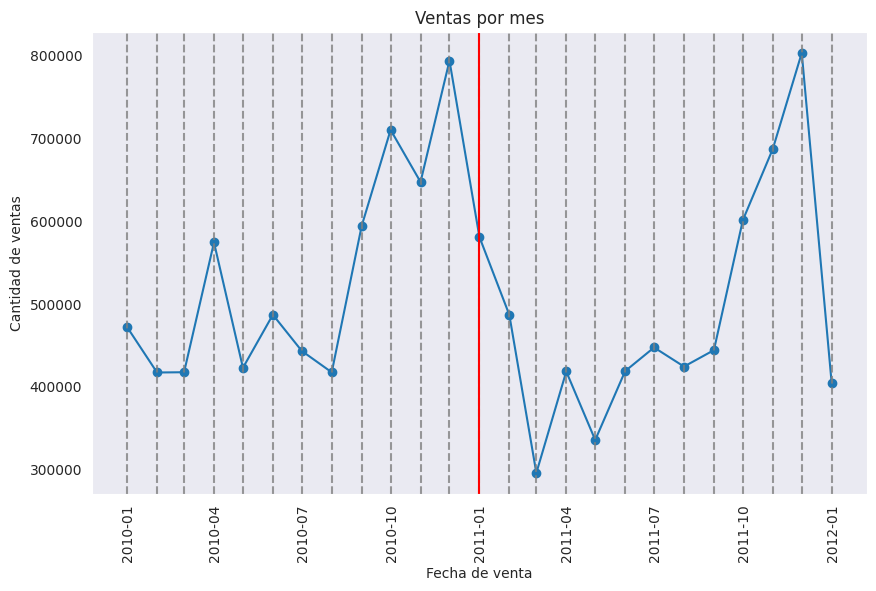

In [ ]:
graph_data(list_data=ventas_por_mes, var_y='y', type_graph=2)

La línea roja úbica el final del año 2010 e incio del año 2011.

* Gracias a la gráfica, se identífica cierto patron de comportamiento en el aumento y/o disminución de ventas dependiendo el mes de al año.
* Entre los meses de **julio-Agosto** de los años ***2010** y **2011** se identífica un patrón de **aumento** de ventas que se mantiene hasta iniciar el mes de *diciembre** que es donde se da el pico máximo de ventas.
* Desde el inicio del mes de **diciembre**, las ventas en los años **2010** y **2011** disminuyeron gradualmente hasta el inicio del **segunto trimestre** del año, donde empieza a estabilizarce hasta lso meses de **julio-agosto**.
* El aumento de los datos coincide con las  fechas feriadas de la mayoria de paises, donde el receso escolar se da a mitad y finalizar el año.

# Identificar si hay comportamientos establecidos de compra por país específico

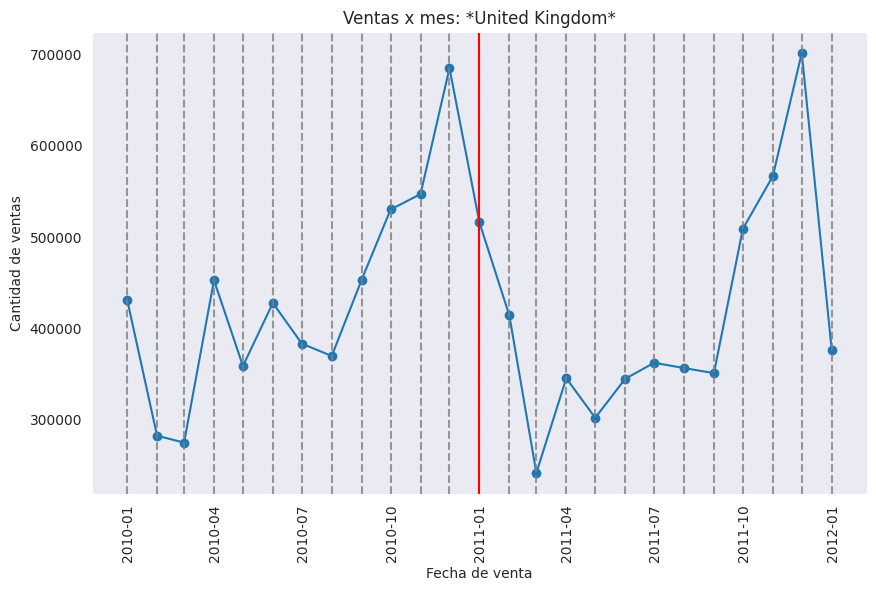

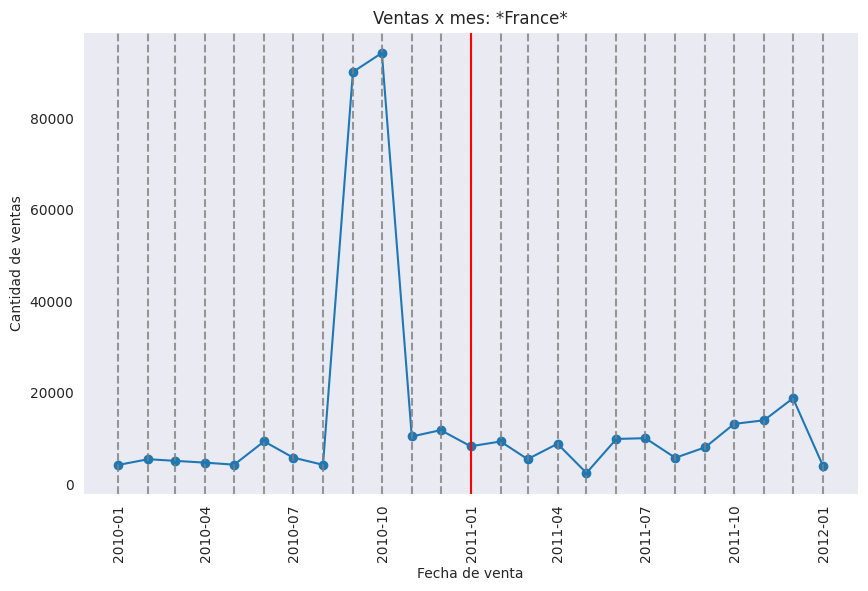

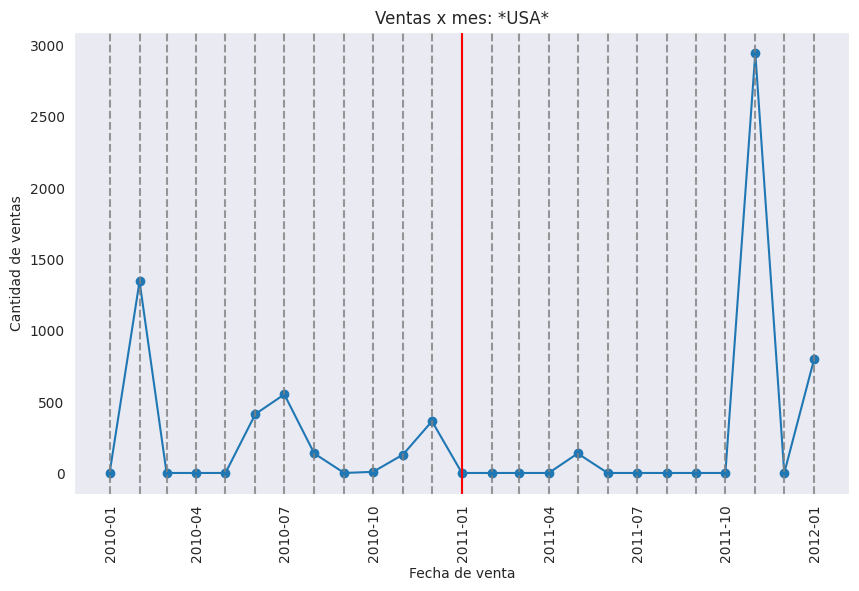

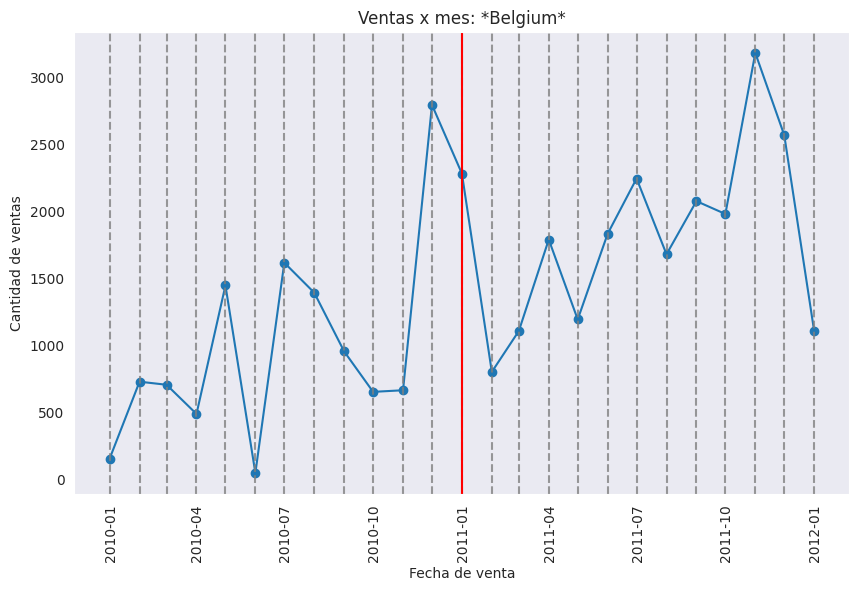

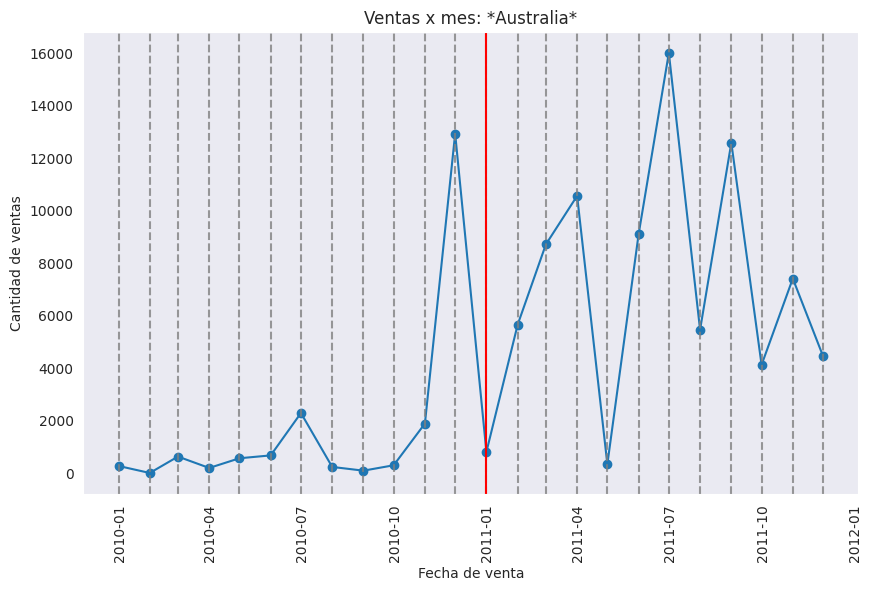

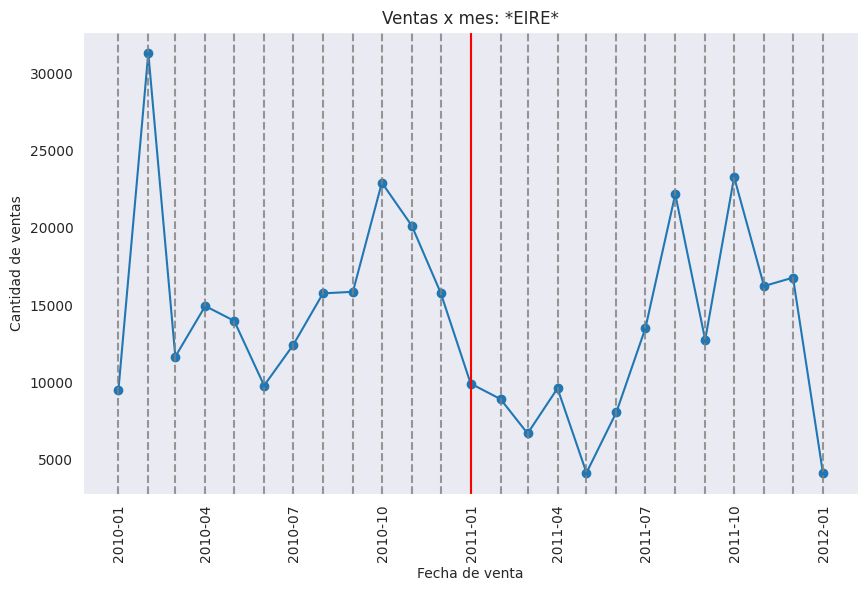

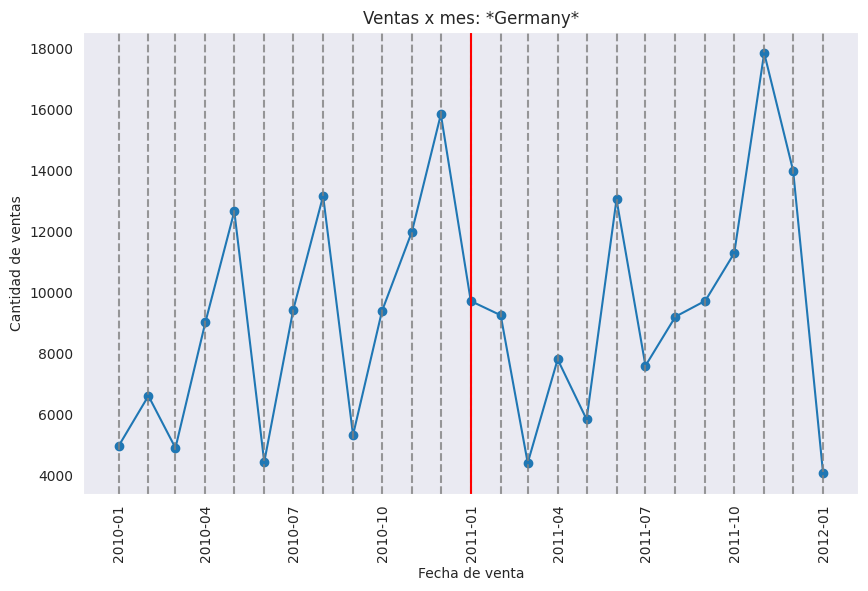

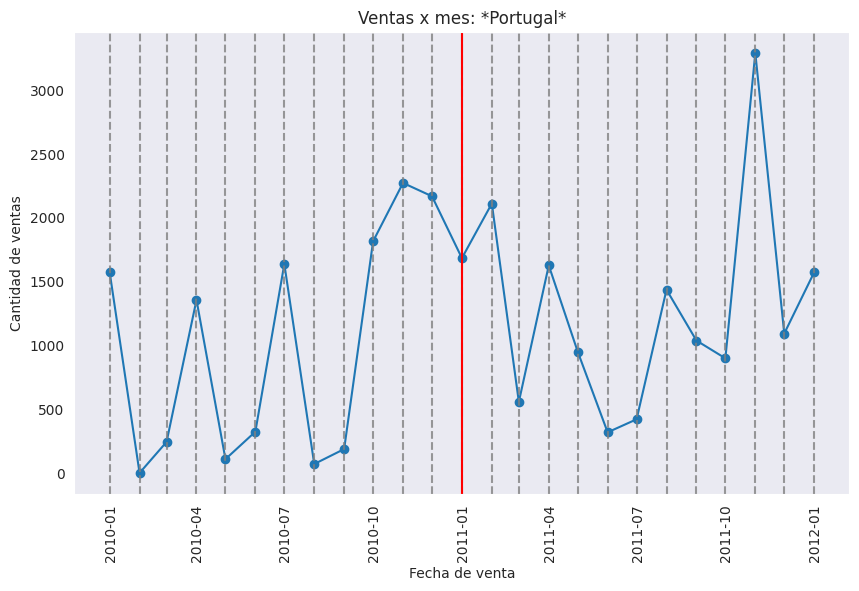

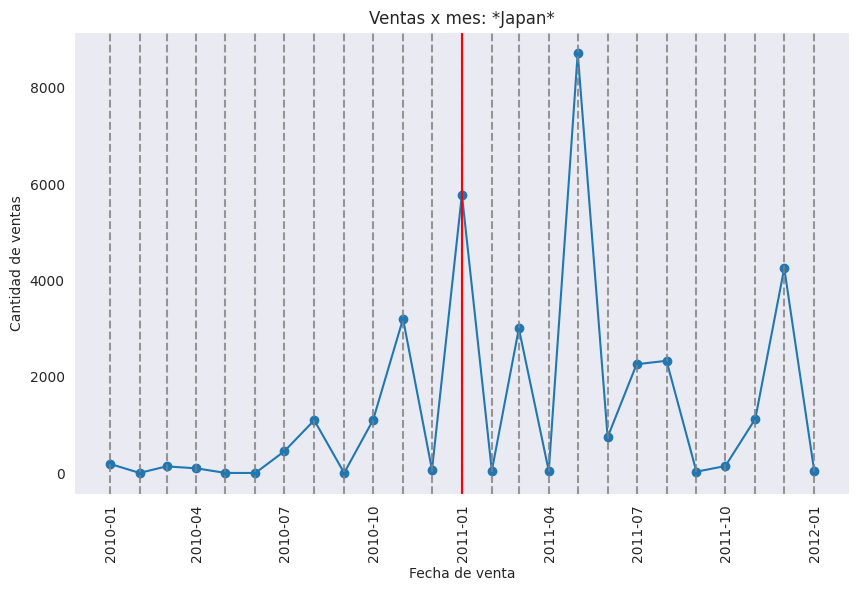

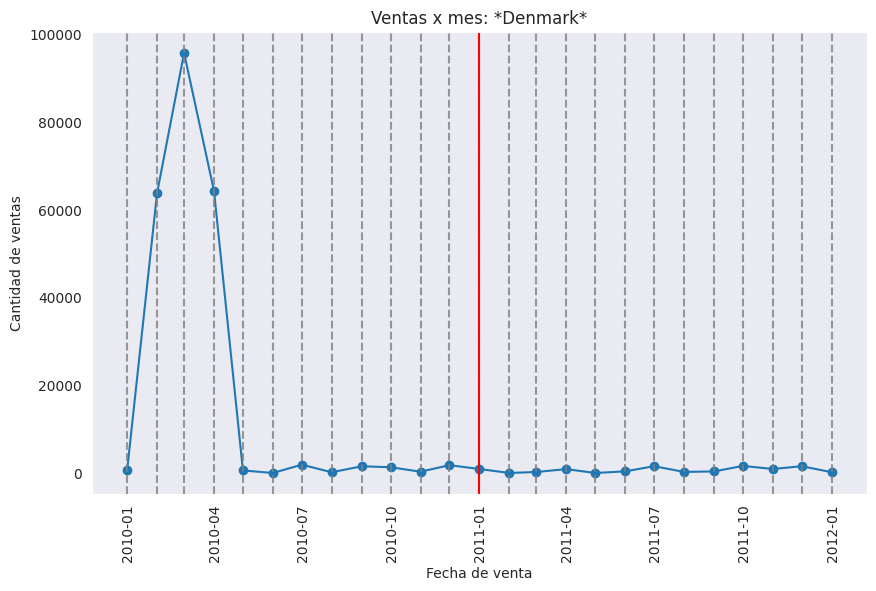

In [ ]:
# Iterar sobre la lista que contiene los nombres de los países del DataSet
for country in list_countries[:10]:

  # Nuevo DataFrame solo con las cantidades vendidas y la fecha de cada venta
  df_ventas = df_online_retail_all_copy[['Quantity', 'InvoiceDate', 'Country', 'Customer ID']][df_online_retail_all_copy['Country'] == country]

  # Realiza el resample para agrupar las ventas por mes y calcular la suma de las ventas por mes para cada país
  ventas_por_mes_pais = df_ventas.resample('M', on='InvoiceDate')['Quantity'].sum()

  graph_data(list_data=ventas_por_mes_pais, var_y='y', type_graph=2, title=f'Ventas x mes: *{country}*')

**Conclusión**:
* 1

# Identificar si hay comportamientos establecidos de ganancia para la organizaciónen función del mes

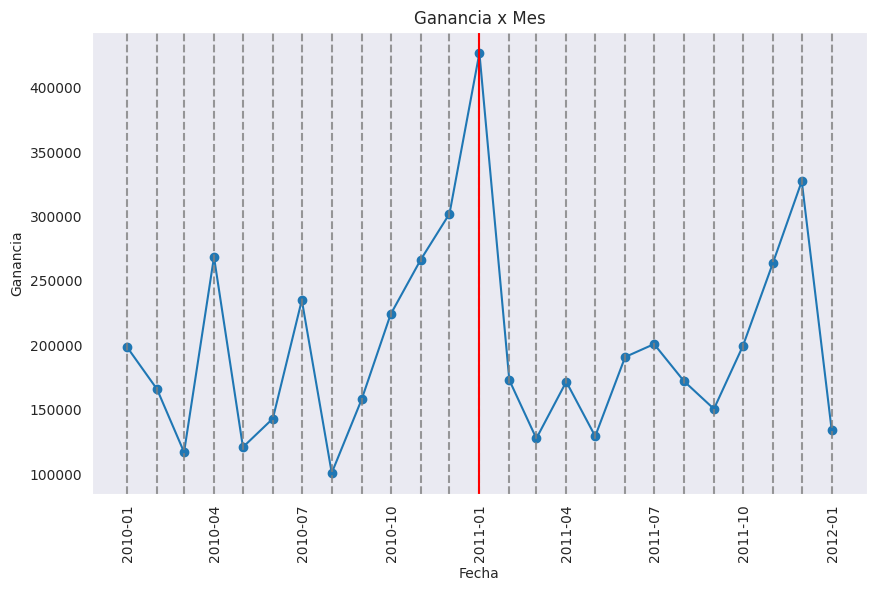

In [ ]:
# Nuevo DataFrame solo con las cantidades vendidas y la fecha de cada venta
df_ventas = df_online_retail_all_copy[['Price', 'InvoiceDate']]

# Agrupar las ventas por mes y sumar las cantidades vendidas por mes
ventas_por_mes = df_ventas.resample('M', on='InvoiceDate')['Price'].sum()

# Gráficar
graph_data(list_data=ventas_por_mes, var_y='y', type_graph=2, title='Ganancia x Mes', label_x='Fecha', label_y='Ganancia')

**Conclusión:**
* 1

___
# **Punto 4**
Realizar un análisis de correlación para determinar la relación entre las variables, por ejemplo,
si existe una correlación entre el precio y la cantidad de ventas.

* Recordar el DataSet

In [ ]:
df_online_retail_all_copy.sample(8)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
476383,534188,22413,METAL SIGN TAKE IT OR LEAVE IT,3,2010-11-21 14:13:00,2.95,17085.0,United Kingdom
279172,516568,22621,TRADITIONAL KNITTING NANCY,12,2010-07-21 12:39:00,1.45,12474.0,Germany
773417,558777,22371,AIRLINE BAG VINTAGE TOKYO 78,1,2011-07-04 10:23:00,4.13,NaN,United Kingdom
340932,522638,21484,CHICK GREY HOT WATER BOTTLE,12,2010-09-16 10:00:00,3.45,13089.0,United Kingdom
2321,489597,85031A,ROMANTIC IMAGES SCRAP BOOK SET,1,2009-12-01 14:28:00,3.43,NaN,United Kingdom
1014404,577858,22086,PAPER CHAIN KIT 50'S CHRISTMAS,1,2011-11-22 11:24:00,2.95,16365.0,United Kingdom
746598,556240,22133,PINK LOVE HEART SHAPE CUP,12,2011-06-09 15:55:00,0.85,18041.0,United Kingdom
126003,501441,85086A,CANDY SPOT HEART DECORATION,5,2010-03-16 13:44:00,1.66,NaN,United Kingdom


* Tipo de datos en las columnas del DataSet

In [ ]:
df_online_retail_all_copy.dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object

La correlación se realiza con columnas de tipo numérico. En el dataset, las columnas que cumplen el criterio son:
* **Quantity**.
* **Price**.

**Customer ID** es una varible categórica

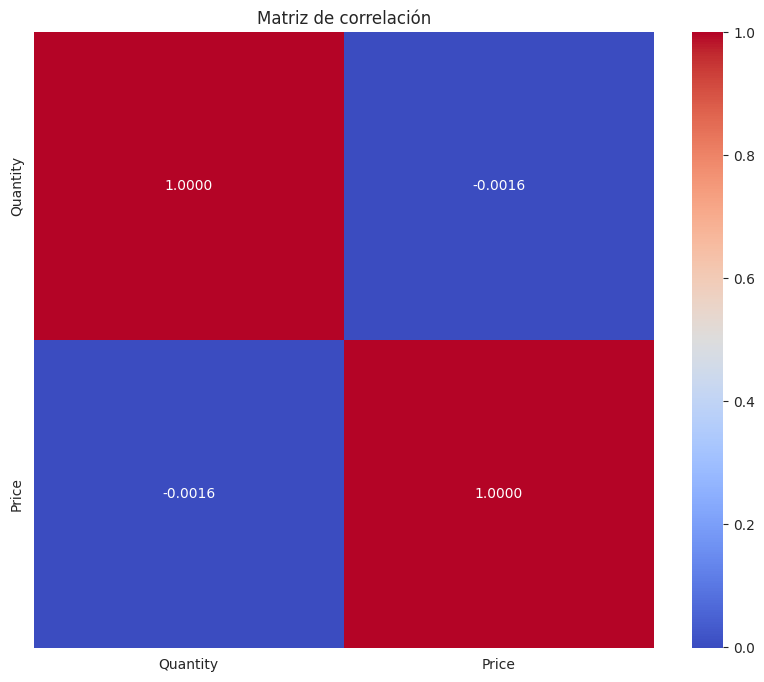

In [ ]:
# Correlaciones de las columnas del DataSet
corrs_dataset = df_online_retail_all_copy[['Quantity', 'Price']].corr();

# Crear gráfico de heatmap
plt.figure(figsize=(10, 8))  # Tamaño de la figura

# Crear y configurar el hetamap
sns.heatmap(corrs_dataset, annot=True, cmap='coolwarm', fmt=".4f")

# Título del heatmap
plt.title('Matriz de correlación')

plt.show()

**Conclusiones**:
* Entre las dos columnas numéricas existe una correlación **NULA**

# Aplicando transformación por **logaritmos**

* El logaritmo natural de 0 y valores negativos no están definidos en los número reales.
* Las columnas **Price** y **Qunatity** tiene registros con valores de 0, por lo que se halla el valor máximo de cada columna y para hallar el Ln, se suma ese valor máximo a todas las filas de la columna.

In [ ]:
# Valores máximo de las columnas "Price" y "Quantity"
max_price = df_online_retail_all_copy['Price'].max()
max_quantity = df_online_retail_all_copy['Quantity'].max()

# Crear nuevas columas con el logaritmo de las columnas "Price" y "Quantity"
df_online_retail_all_copy['log_price'] = np.log(df_online_retail_all_copy['Price'] + max_price)
df_online_retail_all_copy['log_quantity'] = np.log(df_online_retail_all_copy['Quantity'] + max_quantity)

df_online_retail_all_copy

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,log_price,log_quantity
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,10.570726,11.302291
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,10.570721,11.302291
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,10.570721,11.302291
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,10.570601,11.302735
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,10.570579,11.302439
...,...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,10.570601,11.302217
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,10.570654,11.302192
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,10.570654,11.302192
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,10.570674,11.302180


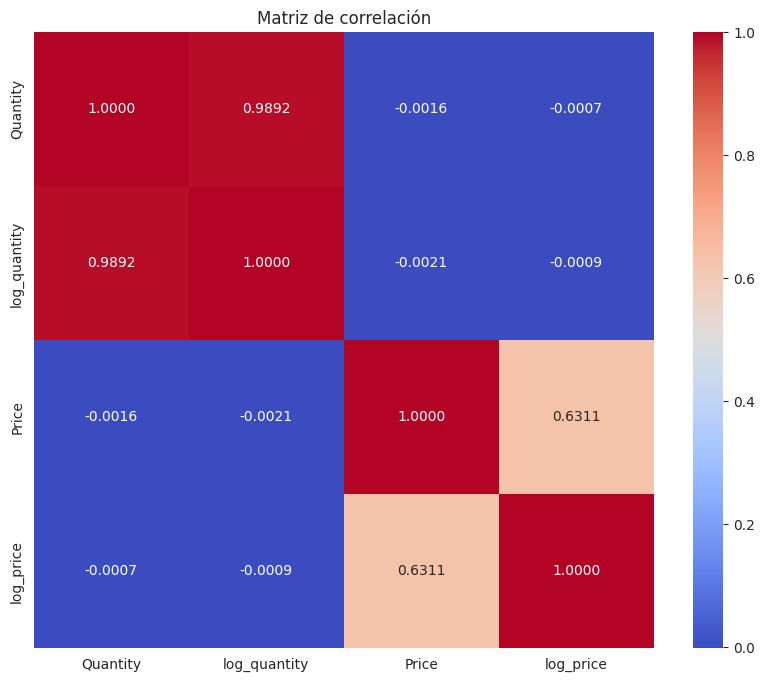

In [ ]:
corrs_dataset = df_online_retail_all_copy[['Quantity', 'log_quantity', 'Price', 'log_price']].corr()

# Crear gráfico de heatmap
plt.figure(figsize=(10, 8))  # Tamaño de la figura

# Crear y configurar el hetamap
sns.heatmap(corrs_dataset, annot=True, cmap='coolwarm', fmt=".4f")

# Título del heatmap
plt.title('Matriz de correlación')

plt.show()

**Conclusiones**:
* Entre las dos columnas numéricas existe una correlación **NULA** aplicando logartimos

# Aplicando transformación por **Normalización**
* X_norm = (X - X_min) / (X_max - X_min)

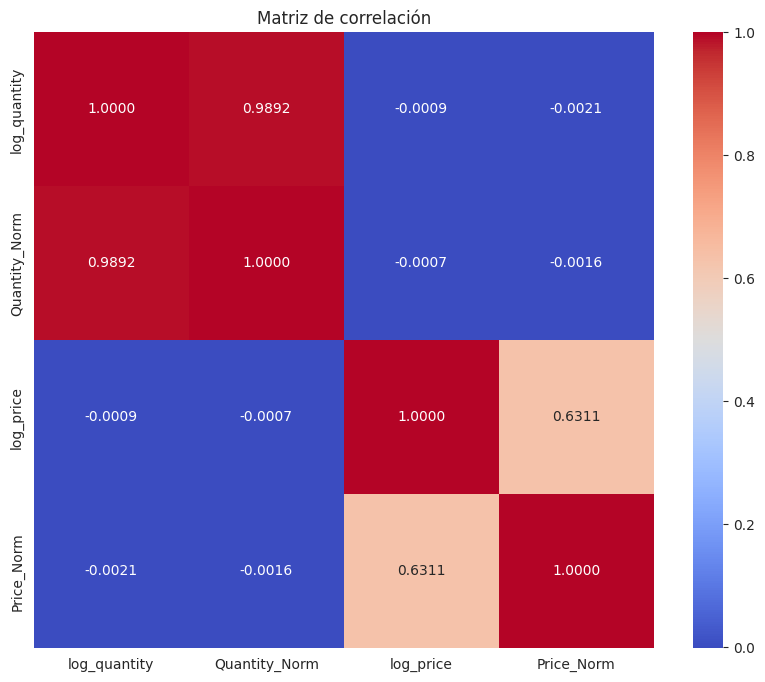

In [ ]:
# Valores mínimos de de las columnas "Price" y "Quantity"
min_price = df_online_retail_all_copy['Price'].min()
min_quantity = df_online_retail_all_copy['Quantity'].min()

# Crear nuevas columas con la normalización de las columnas "Price" y "Quantity"
df_online_retail_all_copy['Price_Norm'] = (df_online_retail_all_copy['Price'] - min_price) / (max_price - min_price)
df_online_retail_all_copy['Quantity_Norm'] = (df_online_retail_all_copy['Quantity'] - min_quantity) / (max_quantity - min_quantity)
corrs_dataset = df_online_retail_all_copy[['log_quantity', 'Quantity_Norm', 'log_price', 'Price_Norm']].corr()

# Crear gráfico de heatmap
plt.figure(figsize=(10, 8))  # Tamaño de la figura

# Crear y configurar el hetamap
sns.heatmap(corrs_dataset, annot=True, cmap='coolwarm', fmt=".4f")

# Título del heatmap
plt.title('Matriz de correlación')

plt.show()

df_db_postgres**Conclusiones**:
* Entre las dos columnas numéricas existe una correlación **NULA** aplicandfo la normalización

<Axes: xlabel='Quantity', ylabel='Price'>

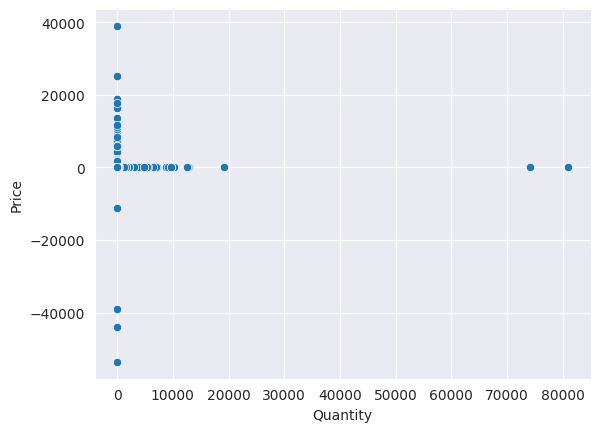

In [ ]:
sns.scatterplot(x='Quantity', y='Price', data=df_online_retail_all_copy)